In [33]:
import pandas as pd

# Load the dataset 
data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\PCA 3\wine.csv")

# Basic exploration
print(data.head())           # Display the first few rows of the dataset
print(data.info())           # Get a summary of the dataframe, including column types and non-null counts
print(data.describe())       # Get descriptive statistics for numerical features


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

First few rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data column

C:\Users\sathv\AppData\Local\Temp\ipykernel_16004\589693889.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


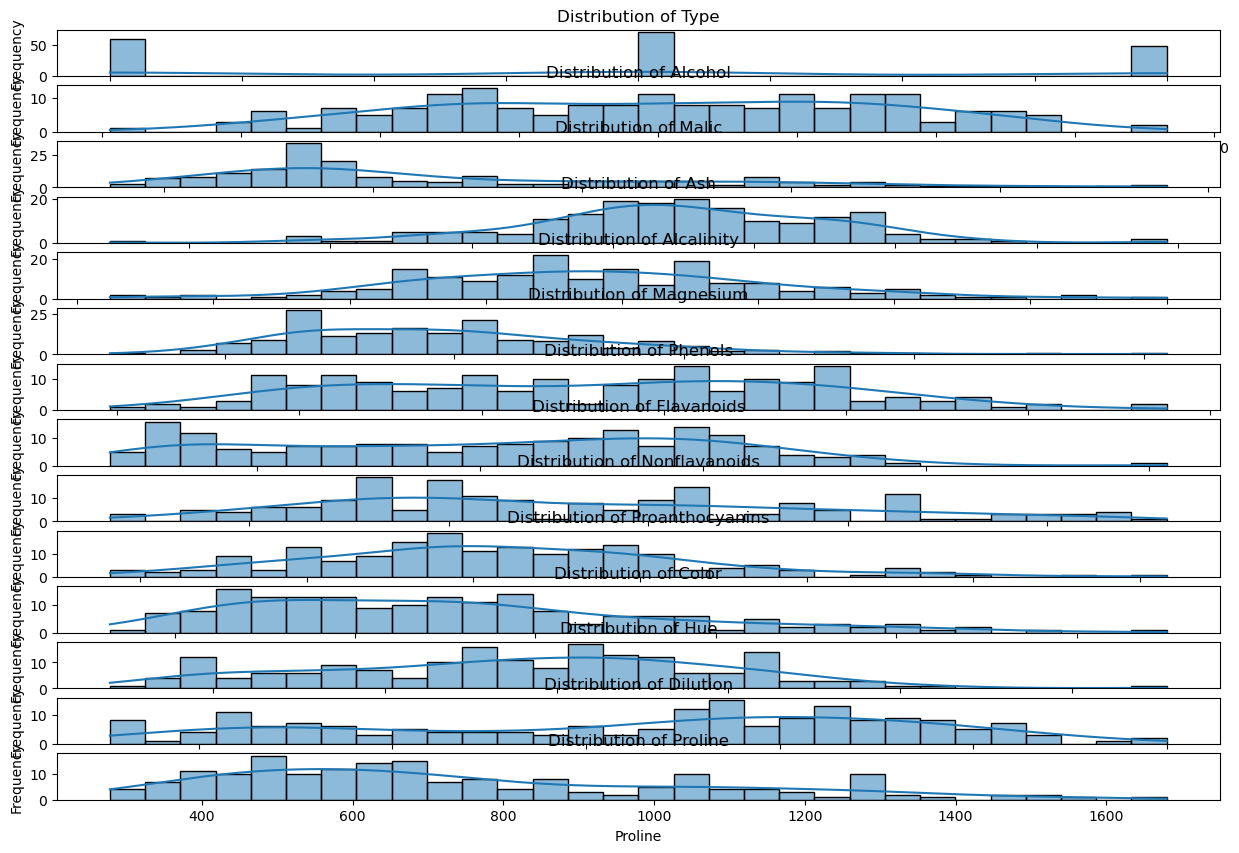

C:\Users\sathv\AppData\Local\Temp\ipykernel_16004\589693889.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


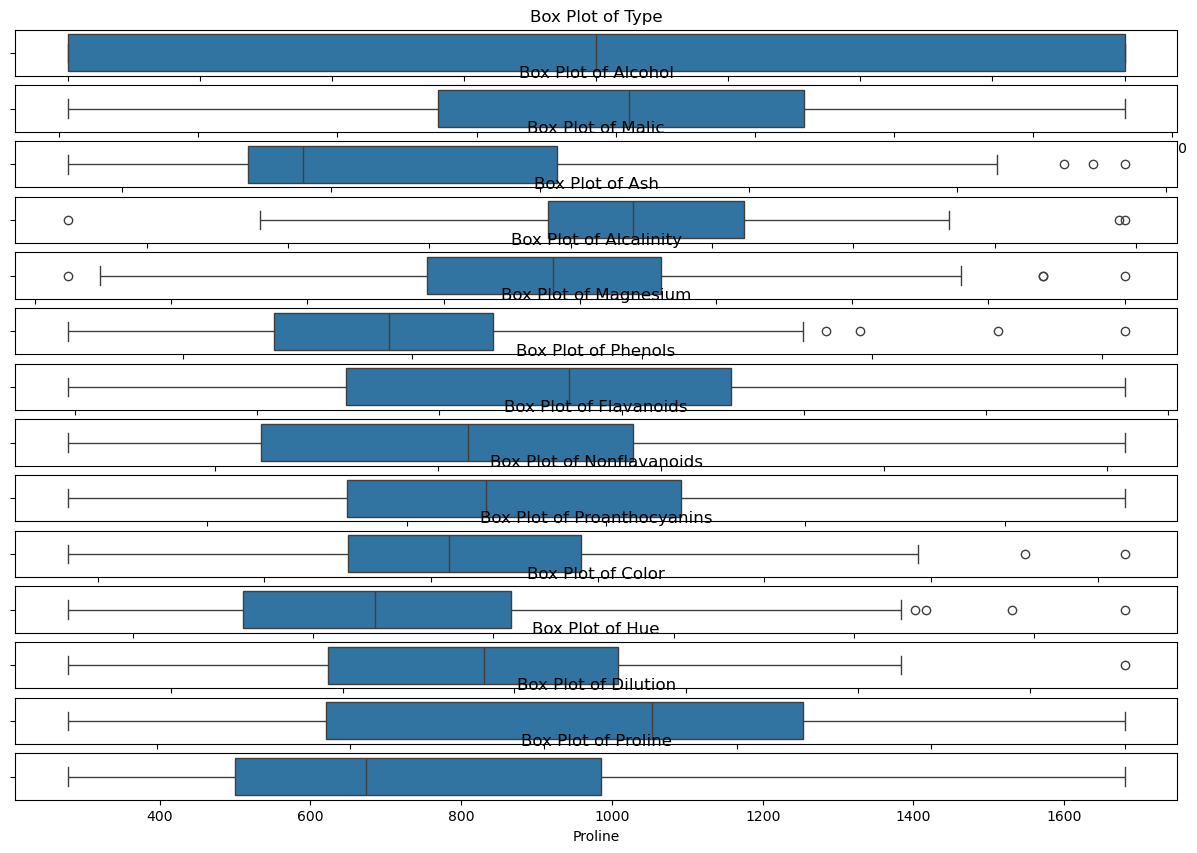

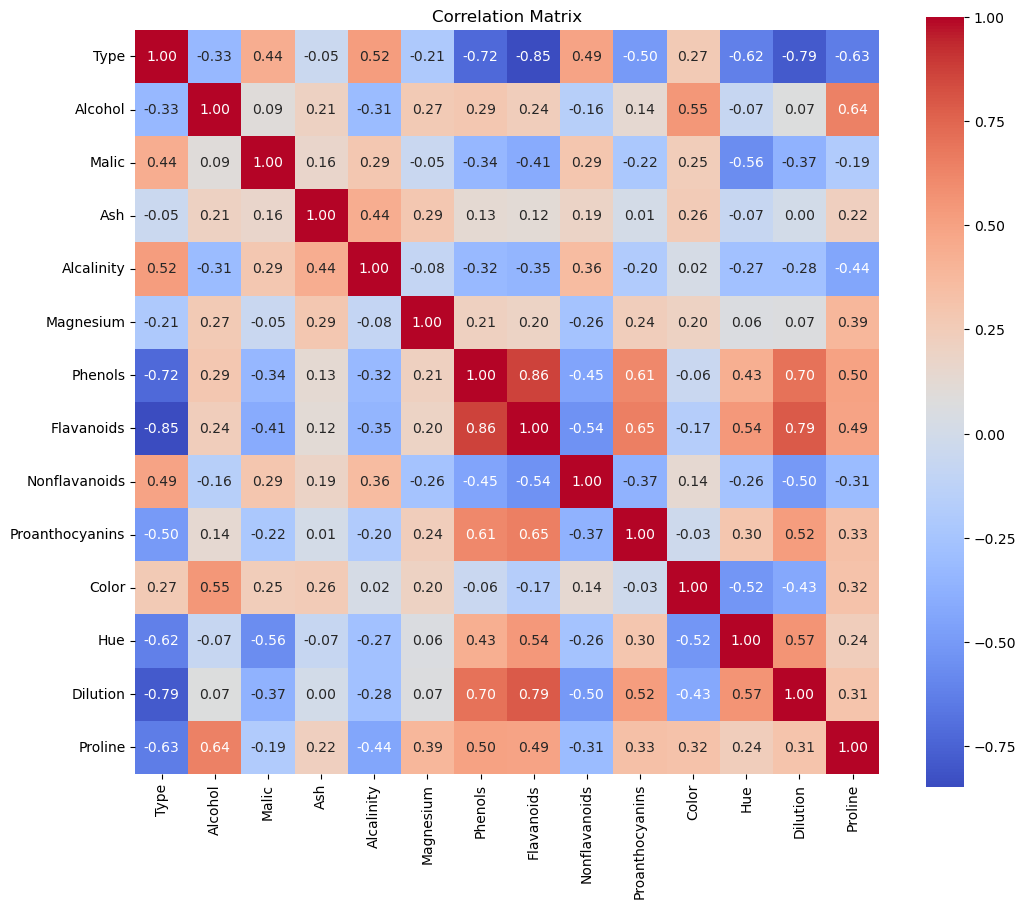

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\PCA 3\wine.csv")

# 1. Basic Data Exploration
print("First few rows of the dataset:")
print(data.head())

print("\nDataset info:")
print(data.info())

print("\nDescriptive statistics:")
print(data.describe())

# 2. Examine the distribution of features
# Plotting histograms for each numerical feature
num_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots for identifying outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# 3. Investigate correlations between features
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Optionally, you can save the correlation matrix to a CSV file
# correlation_matrix.to_csv('correlation_matrix.csv')


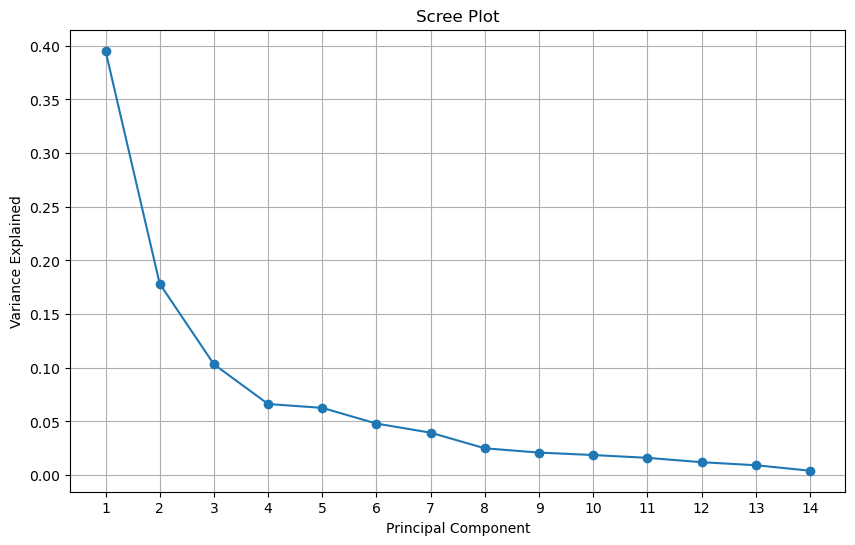

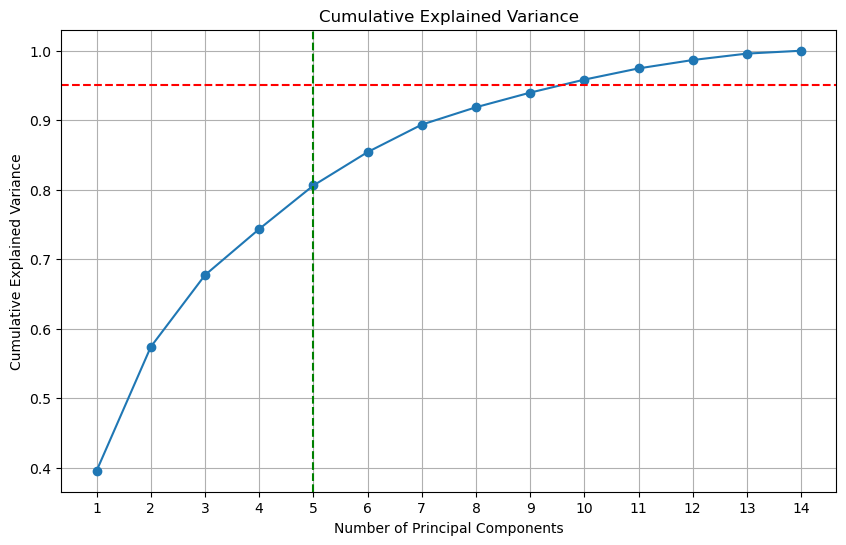

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline       PC1  \
0           0.28             2.29   5.64  1.04      3.92     1065 -3.522934   
1           0.26             1.28   4.38  1.05      3.40     1050 -2.528858   
2           0.30             2.81   5.68  1.03      3.17     1185 -2.785029   
3           0.24             2.18   7.80  0.86      3.45     1480 -3.922588   
4           0.39             1.82   4.32  1.04      2.93      735 -1.407511   

        PC2       PC3       PC4       PC5  
0 -1.453098 -0.164

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\PCA 3\wine.csv")

# 1. Standardize the features
# Select only numerical features for PCA
num_features = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

# 2. Implement PCA
pca = PCA()
pca.fit(scaled_data)

# Determine the explained variance
explained_variance = pca.explained_variance_ratio_

# 2.1 Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# 2.2 Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=5, color='g', linestyle='--')  # Example: Change as per your findings
plt.show()

# 3. Transform the original dataset into the principal components
# Select optimal number of components (for example, let's say we found 5 from the scree plot)
optimal_components = 5
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(optimal_components)])

# Optionally, concatenate with the original data (if needed)
final_df = pd.concat([data.reset_index(drop=True), principal_df], axis=1)

# Display the transformed DataFrame
print(final_df.head())

# Save the transformed DataFrame to a CSV file (optional)
# final_df.to_csv('transformed_data_with_pca.csv', index=False)



C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

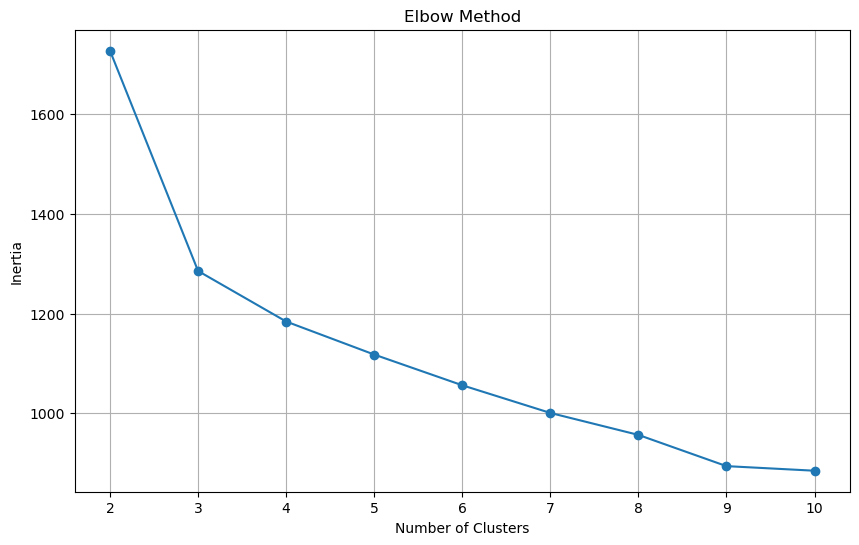

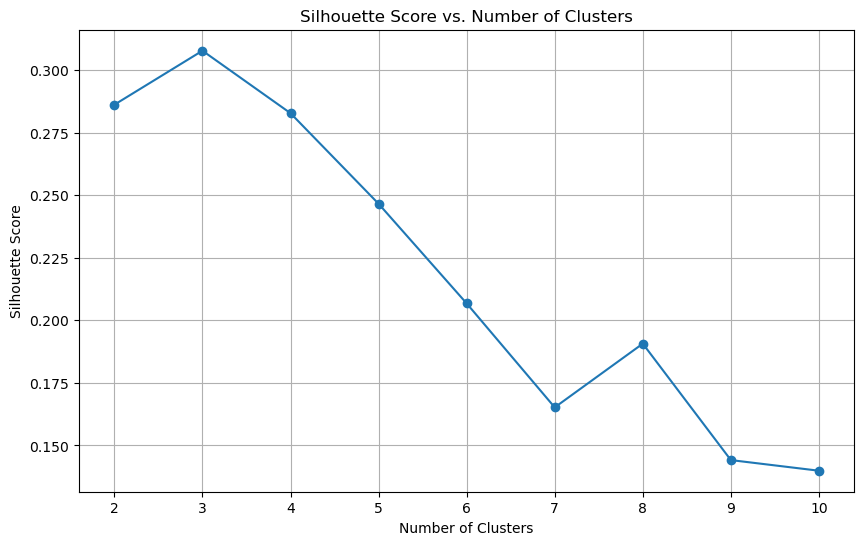

C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AttributeError: module 'seaborn' has no attribute 'scatt'

<Figure size 1000x600 with 0 Axes>

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Load the dataset

data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\PCA 3\wine.csv")

# 1. Apply K-means Clustering
# Standardize the features (if needed)
num_features = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Testing clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid()
plt.show()

# Choose an optimal number of clusters (based on Elbow or Silhouette score)
optimal_clusters = 3  # Example: change based on your findings

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# 2. Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatt


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

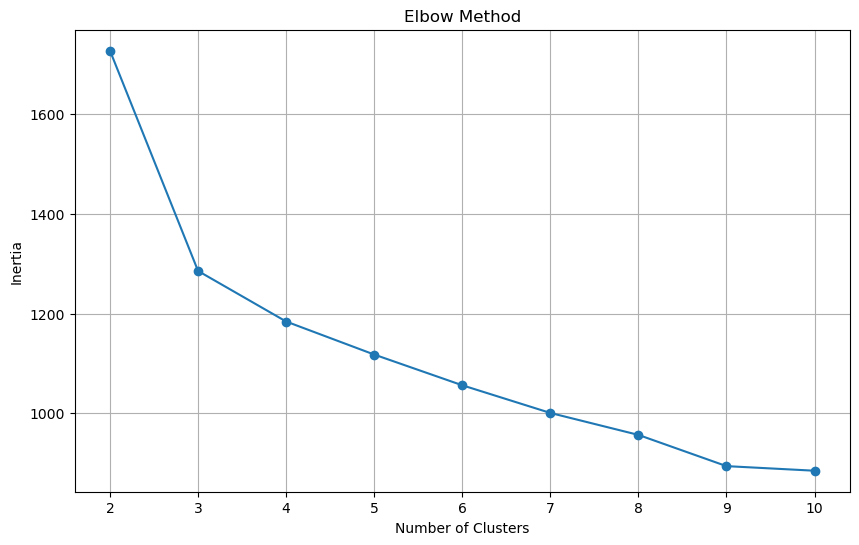

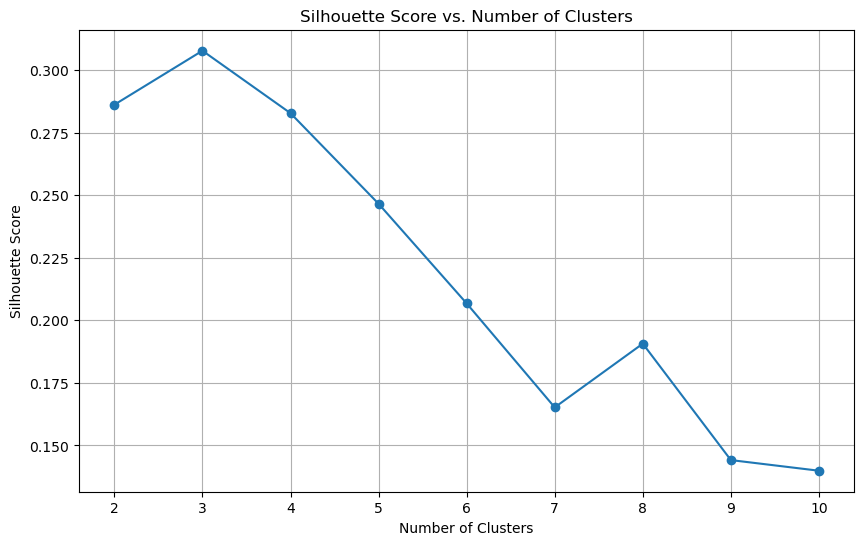

C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


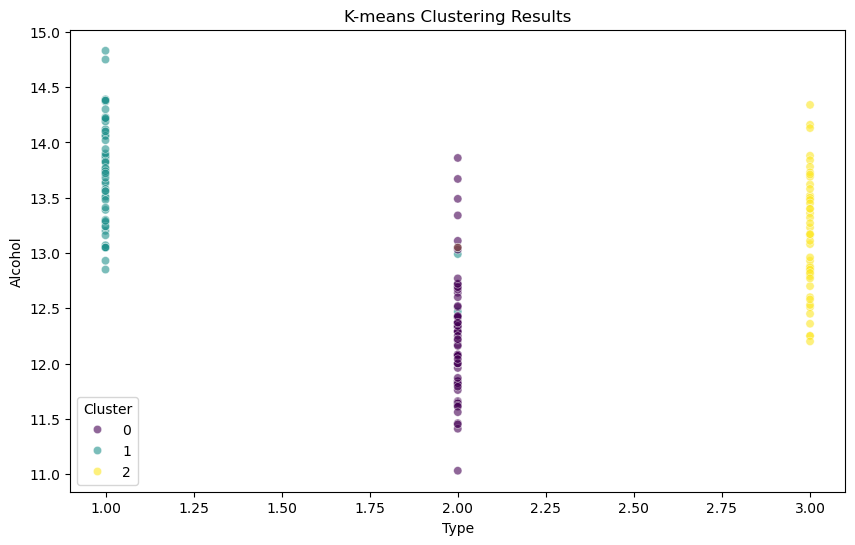

Silhouette Score: 0.308
Davies-Bouldin Index: 1.316


In [9]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load the dataset

data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\PCA 3\wine.csv")

# 1. Apply K-means Clustering
# Standardize the features (if needed)
num_features = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Testing clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid()
plt.show()

# Choose an optimal number of clusters (based on Elbow or Silhouette score)
optimal_clusters = 3  # Example: change based on your findings

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# 2. Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[num_features.columns[0]], y=data[num_features.columns[1]], hue=data['Cluster'], palette='viridis', alpha=0.6)
plt.title('K-means Clustering Results')
plt.xlabel(num_features.columns[0])
plt.ylabel(num_features.columns[1])
plt.legend(title='Cluster')
plt.show()

# 3. Evaluate clustering performance
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
davies_bouldin = davies_bouldin_score(scaled_data, data['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')

# Optionally, save the DataFrame with cluster labels
# data.to_csv('clustered_data.csv', index=False)


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


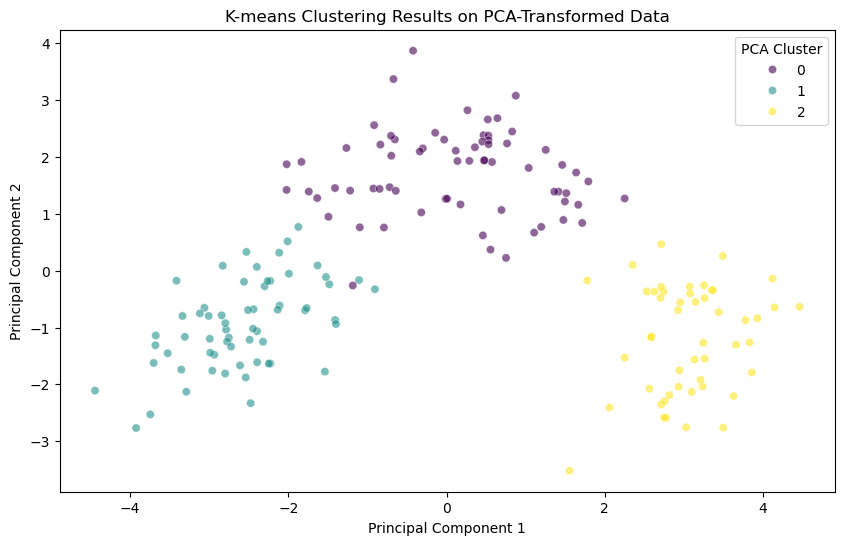

C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


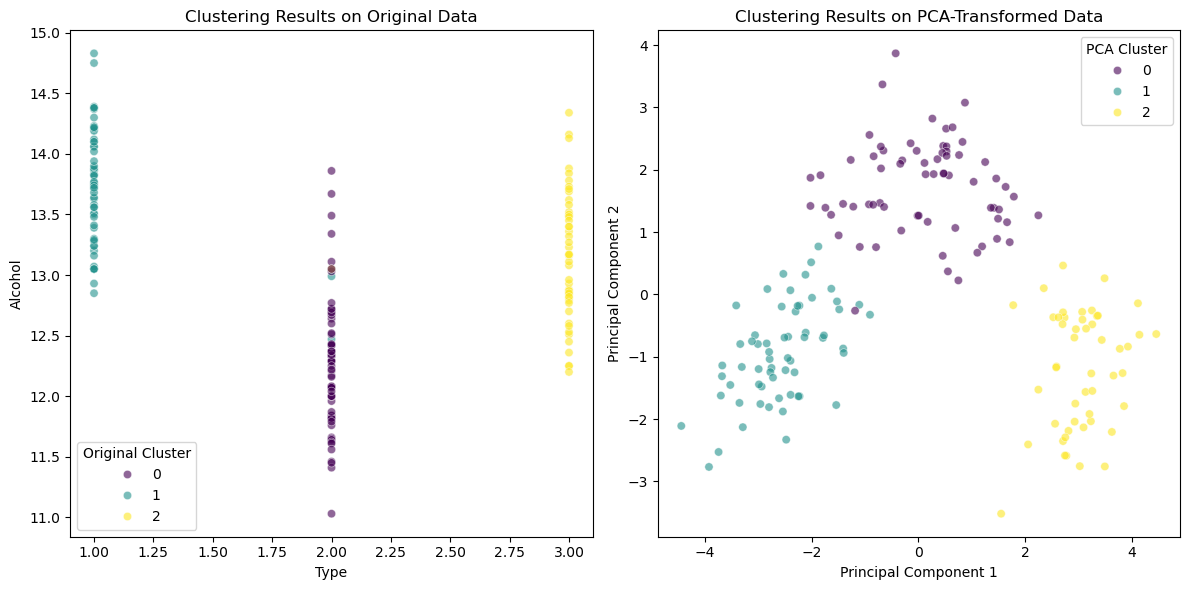

Clustering Performance Comparison:
Original Data - Silhouette Score: 0.308, Davies-Bouldin Index: 1.316
PCA Data - Silhouette Score: 0.324, Davies-Bouldin Index: 1.258


In [13]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load the dataset
data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\PCA 3\wine.csv")
# Standardize the features
num_features = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

# 1. Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_transformed = pca.fit_transform(scaled_data)

# 2. Apply K-means Clustering to PCA-transformed data
optimal_clusters = 3  # Use the number of clusters found previously
kmeans_pca = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['PCA_Cluster'] = kmeans_pca.fit_predict(pca_transformed)

# Visualize the clustering results for PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=data['PCA_Cluster'], palette='viridis', alpha=0.6)
plt.title('K-means Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='PCA Cluster')
plt.show()

# 3. Compare clustering results with original data
# Apply K-means clustering to original data
kmeans_original = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['Original_Cluster'] = kmeans_original.fit_predict(scaled_data)

# Visualize clustering results from both datasets
plt.figure(figsize=(12, 6))

# Original Data Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=data[num_features.columns[0]], y=data[num_features.columns[1]], hue=data['Original_Cluster'], palette='viridis', alpha=0.6)
plt.title('Clustering Results on Original Data')
plt.xlabel(num_features.columns[0])
plt.ylabel(num_features.columns[1])
plt.legend(title='Original Cluster')

# PCA Data Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=data['PCA_Cluster'], palette='viridis', alpha=0.6)
plt.title('Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='PCA Cluster')

plt.tight_layout()
plt.show()

# Evaluate clustering performance for both original and PCA data
silhouette_original = silhouette_score(scaled_data, data['Original_Cluster'])
davies_bouldin_original = davies_bouldin_score(scaled_data, data['Original_Cluster'])

silhouette_pca = silhouette_score(pca_transformed, data['PCA_Cluster'])
davies_bouldin_pca = davies_bouldin_score(pca_transformed, data['PCA_Cluster'])

print("Clustering Performance Comparison:")
print(f"Original Data - Silhouette Score: {silhouette_original:.3f}, Davies-Bouldin Index: {davies_bouldin_original:.3f}")
print(f"PCA Data - Silhouette Score: {silhouette_pca:.3f}, Davies-Bouldin Index: {davies_bouldin_pca:.3f}")

# Optionally, save the DataFrame with cluster labels
# data.to_csv('clustered_data_with_pca.csv', index=False)


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


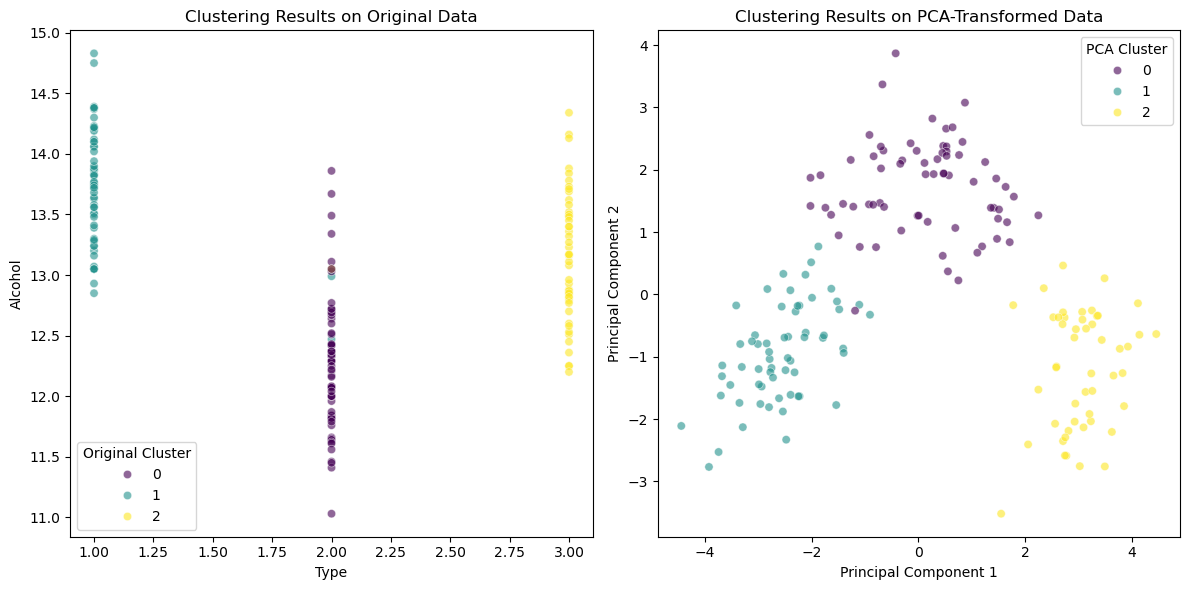

Clustering Performance Comparison:
Original Data - Silhouette Score: 0.308, Davies-Bouldin Index: 1.316
PCA Data - Silhouette Score: 0.324, Davies-Bouldin Index: 1.258

Trade-offs between using PCA and clustering directly on original dataset:
- PCA can reduce the dimensionality and computational cost but may lose some information.
- Clustering on original data retains all features, possibly revealing more complex relationships.
- PCA helps in visualizing data better but can obscure specific patterns present in the original data.


In [14]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"


# 1. Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_transformed = pca.fit_transform(scaled_data)

# 2. Apply K-means Clustering to PCA-transformed data
optimal_clusters = 3  # Set the number of clusters
kmeans_pca = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['PCA_Cluster'] = kmeans_pca.fit_predict(pca_transformed)

# 3. Apply K-means clustering to original data
kmeans_original = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['Original_Cluster'] = kmeans_original.fit_predict(scaled_data)

# 4. Visualize clustering results
plt.figure(figsize=(12, 6))

# Original Data Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=data[num_features.columns[0]], y=data[num_features.columns[1]], hue=data['Original_Cluster'], palette='viridis', alpha=0.6)
plt.title('Clustering Results on Original Data')
plt.xlabel(num_features.columns[0])
plt.ylabel(num_features.columns[1])
plt.legend(title='Original Cluster')

# PCA Data Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=data['PCA_Cluster'], palette='viridis', alpha=0.6)
plt.title('Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='PCA Cluster')

plt.tight_layout()
plt.show()

# 5. Evaluate clustering performance for both original and PCA data
silhouette_original = silhouette_score(scaled_data, data['Original_Cluster'])
davies_bouldin_original = davies_bouldin_score(scaled_data, data['Original_Cluster'])

silhouette_pca = silhouette_score(pca_transformed, data['PCA_Cluster'])
davies_bouldin_pca = davies_bouldin_score(pca_transformed, data['PCA_Cluster'])

# Print evaluation metrics
print("Clustering Performance Comparison:")
print(f"Original Data - Silhouette Score: {silhouette_original:.3f}, Davies-Bouldin Index: {davies_bouldin_original:.3f}")
print(f"PCA Data - Silhouette Score: {silhouette_pca:.3f}, Davies-Bouldin Index: {davies_bouldin_pca:.3f}")

# Analyze trade-offs
print("\nTrade-offs between using PCA and clustering directly on original dataset:")
print("- PCA can reduce the dimensionality and computational cost but may lose some information.")
print("- Clustering on original data retains all features, possibly revealing more complex relationships.")
print("- PCA helps in visualizing data better but can obscure specific patterns present in the original data.")


In [16]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"


# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_transformed = pca.fit_transform(scaled_data)

# Apply K-means Clustering to PCA-transformed data
optimal_clusters = 3  # Set the number of clusters
kmeans_pca = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['PCA_Cluster'] = kmeans_pca.fit_predict(pca_transformed)

# Apply K-means clustering to original data
kmeans_original = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
data['Original_Cluster'] = kmeans_original.fit_predict(scaled_data)

# Evaluate clustering performance for both original and PCA data
silhouette_original = silhouette_score(scaled_data, data['Original_Cluster'])
davies_bouldin_original = davies_bouldin_score(scaled_data, data['Original_Cluster'])

silhouette_pca = silhouette_score(pca_transformed, data['PCA_Cluster'])
davies_bouldin_pca = davies_bouldin_score(pca_transformed, data['PCA_Cluster'])

# Conclusion and Insights
print("Key Findings and Insights:")
print(f"1. Original Data - Silhouette Score: {silhouette_original:.3f}, Davies-Bouldin Index: {davies_bouldin_original:.3f}")
print(f"2. PCA Data - Silhouette Score: {silhouette_pca:.3f}, Davies-Bouldin Index: {davies_bouldin_pca:.3f}")

# Discussion of practical implications
print("\nPractical Implications of Using PCA and Clustering:")
print("- PCA can simplify data visualization and analysis by reducing dimensions while retaining variance.")
print("- Clustering algorithms like K-means can be sensitive to the feature scale and dimensionality.")
print("- Dimensionality reduction can help improve clustering performance in high-dimensional spaces.")

# Recommendations
print("\nRecommendations for Using Each Technique:")
print("- Use PCA when dealing with high-dimensional data to reduce noise and visualize data effectively.")
print("- Clustering on original data is beneficial when interpretability of specific features is crucial.")
print("- Consider using both techniques in a pipeline for exploratory data analysis, starting with PCA followed by clustering.")

# Optional: Save the final dataset with cluster labels
# data.to_csv('final_clustered_data.csv', index=False)


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Key Findings and Insights:
1. Original Data - Silhouette Score: 0.308, Davies-Bouldin Index: 1.316
2. PCA Data - Silhouette Score: 0.324, Davies-Bouldin Index: 1.258

Practical Implications of Using PCA and Clustering:
- PCA can simplify data visualization and analysis by reducing dimensions while retaining variance.
- Clustering algorithms like K-means can be sensitive to the feature scale and dimensionality.
- Dimensionality reduction can help improve clustering performance in high-dimensional spaces.

Recommendations for Using Each Technique:
- Use PCA when dealing with high-dimensional data to reduce noise and visualize data effectively.
- Clustering on original data is beneficial when interpretability of specific features is crucial.
- Consider using both techniques in a pipeline for exploratory data analysis, starting with PCA followed by clustering.
